In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot

In [2]:
df =pd.read_csv('VCB_Stock_Data (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-27,12352.807617,12352.807617,12181.833984,12181.833984,12181.833984,1740361.0
1,2014-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-29,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-30,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2555,2023-12-08,85200.000000,85500.000000,85000.000000,85000.000000,85000.000000,1293000.0
2556,2023-12-11,85000.000000,85300.000000,84100.000000,84200.000000,84200.000000,2768100.0
2557,2023-12-12,84700.000000,84700.000000,84000.000000,84200.000000,84200.000000,1148400.0
2558,2023-12-13,84200.000000,84500.000000,83700.000000,83700.000000,83700.000000,2541000.0


In [3]:
data = df['Close'][::-1];
val= data.reset_index(drop=True);
val

0                NaN
1       83700.000000
2       84200.000000
3       84200.000000
4       85000.000000
            ...     
2555             NaN
2556             NaN
2557             NaN
2558             NaN
2559    12181.833984
Name: Close, Length: 2560, dtype: float64

In [4]:
# Create a date range starting from a specific date
start_date = '1/27/2014'
stop_date = '12/14/2023'
dates = pd.date_range(start=start_date, periods=len(val),freq='D')

In [5]:
# 2.  chia train test theo tỉ lệ 8-2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.8* len(df))
test_size = int(0.2* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=31621.884, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31636.221, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31638.211, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31638.215, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31636.786, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31636.443, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31637.001, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=31619.748, Time=1.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=31633.860, Time=1.54 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=31621.656, Time=1.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=31621.741, Time=3.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=31619.767, Time=1.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=31631.958, Time=0.70 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=31624.031, Time=2.61 sec
 ARIMA(3,1,2)(0,0,0

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

In [7]:
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [8]:
#Train all data to predict next 30 days.

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[65717.78899315 65494.23732229 65511.4263486  65724.66298797
 65821.13227734 65709.01536214 65609.72602642 65687.54804006
 65825.6619425  65841.87208033 65759.59369416 65738.41658299
 65822.89206614 65899.26459855 65885.28415338 65841.831353
 65861.08183698 65929.72200244 65966.42568407 65949.62864649
 65937.75585773 65971.96484558 66020.55264401 66036.89939466
 66028.49007324 66036.75780924 66072.11001096 66104.5493559
 66113.49198847 66115.43445476]


Testing RMSE: 8847.480172842834
Testing MAPE: 0.09402839088582812
Testing MSLE: 0.013580745492473359


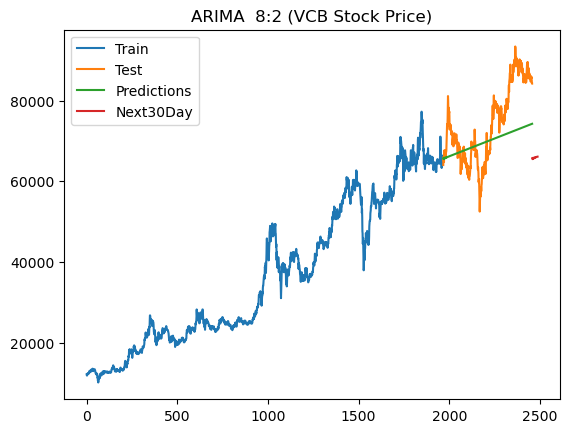

In [12]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# Calculate MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)
# 9.Vẽ hình
plt.title( 'ARIMA  8:2 (VCB Stock Price)')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()